In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from scipy import stats
from statannot import add_stat_annotation

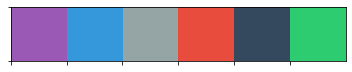

In [2]:
custcol = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

sns.palplot(sns.color_palette(custcol))

In [3]:
datapath = "./"
file_to_open = datapath + "/Figure2a_raw_data.txt"

# print(os.path.realpath(file_to_open))

In [4]:
data0 = pd.read_csv(file_to_open, sep = "\t", header = 0)

In [5]:
data0["titer"] = np.log10(data0['titer'])

In [6]:
data1 = data0.groupby(["hpi", "temperature", "virus", "donor", "treatment"]).mean().reset_index()

In [7]:
t33 = data1.loc[data1["temperature"]==33]
t37 = data1.loc[data1["temperature"]==37]

In [8]:
SARS_33 = t33.loc[t33["virus"]== "SARS"]
SARS2_33 = t33.loc[t33["virus"]== "SARS2"]

SARS_37 = t37.loc[t37["virus"]== "SARS"]
SARS2_37 = t37.loc[t37["virus"]== "SARS2"]

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1_T1 v.s. 1_T3: t-test paired samples, P_val=5.307e-01 stat=-7.516e-01
24_N v.s. 24_T1: t-test paired samples, P_val=3.144e-01 stat=1.332e+00
24_T1 v.s. 24_T3: t-test paired samples, P_val=2.349e-01 stat=1.680e+00
48_N v.s. 48_T1: t-test paired samples, P_val=8.675e-02 stat=3.170e+00
72_N v.s. 72_T1: t-test paired samples, P_val=2.602e-02 stat=6.078e+00
72_T1 v.s. 72_T3: t-test paired samples, P_val=4.226e-01 stat=-1.000e+00
1_N v.s. 1_T1: t-test paired samples, P_val=5.678e-01 stat=-6.779e-01
24_N v.s. 24_T3: t-test paired samples, P_val=1.840e-01 stat=1.996e+00
48_N v.s. 48_T3: t-test paired samples, P_val=8.675e-02 stat=3.170e+00
72_N v.s. 72_T3: t-test paired samples, P_val=5.432e-02 stat=4.114e+00
1_N v.s. 1_T3: t-test paired samples, P_val=1.706e-01 stat=-2.099e+00


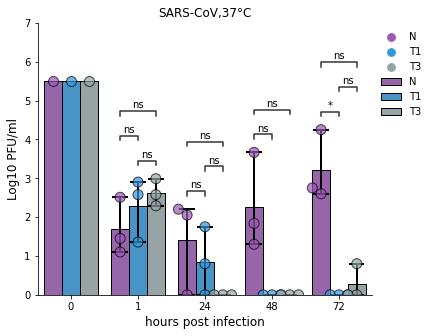

In [9]:
f = plt.figure(figsize=(6, 5))
ax = sns.barplot(data= SARS_37,
                x='hpi',
                y='titer', 
                hue="treatment",
                hue_order= ["N", "T1", "T3"],
                palette = sns.color_palette(custcol),
                linewidth=1,
                edgecolor = "black",
                capsize=.2,
                errcolor = "black",
                errwidth=2,
                 )
g1 = sns.swarmplot(data= SARS_37,
                x='hpi',
                y='titer', 
                hue="treatment",
                hue_order= ["N", "T1", "T3"],
                dodge = True, 
                palette = sns.color_palette(custcol),
                size = 10,
                linewidth=1,
                edgecolor = "black",
                alpha = 0.7,
                )


x = "hpi"
y='titer'
hue = "treatment"
box_pairs=[
    ((1.0, "N"), (1.0, "T1")),
    ((1.0, "N"), (1.0, "T3")),
    ((1.0, "T1"), (1.0, "T3")),
    ((24.0, "N"), (24.0, "T1")),
    ((24.0, "N"), (24.0, "T3")),
    ((24.0, "T1"), (24.0, "T3")),
    ((48.0, "N"), (48.0, "T1")),
    ((48.0, "N"), (48.0, "T3")),
    #((48.0, "T1"), (48.0, "T3")),
    ((72.0, "N"), (72.0, "T1")),
    ((72.0, "N"), (72.0, "T3")),
    ((72.0, "T1"), (72.0, "T3")),
    ]
add_stat_annotation(ax, data=SARS_37, x=x, y=y, hue=hue, hue_order= ["N", "T1", "T3"], box_pairs=box_pairs, test="t-test_paired",comparisons_correction= None, loc='inside', verbose=2)


plt.yscale("linear")
plt.ylim([0,7])
plt.title("SARS-CoV,37°C")
plt.ylabel("Log10 PFU/ml",size="large")
plt.xlabel("hours post infection",size="large")
plt.legend(loc="upper left", bbox_to_anchor=(1,1), frameon=False)

sns.despine()

plt.savefig('FIgure2aI.pdf', bbox_inches = 'tight')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1_T1 v.s. 1_T3: t-test paired samples, P_val=6.834e-01 stat=4.721e-01
24_N v.s. 24_T1: t-test paired samples, P_val=2.435e-01 stat=1.636e+00
24_T1 v.s. 24_T3: t-test paired samples, P_val=7.156e-01 stat=-4.195e-01
48_N v.s. 48_T1: t-test paired samples, P_val=2.322e-03 stat=2.072e+01
72_N v.s. 72_T1: t-test paired samples, P_val=3.083e-02 stat=5.562e+00
72_T1 v.s. 72_T3: t-test paired samples, P_val=4.226e-01 stat=-1.000e+00
1_N v.s. 1_T1: t-test paired samples, P_val=9.191e-01 stat=1.148e-01
24_N v.s. 24_T3: t-test paired samples, P_val=8.570e-01 stat=2.043e-01
48_N v.s. 48_T3: t-test paired samples, P_val=2.322e-03 stat=2.072e+01
72_N v.s. 72_T3: t-test paired samples, P_val=1.966e-02 stat=7.027e+00
1_N v.s. 1_T3: t-test paired samples, P_val=7.638e-01 stat=3.438e-01


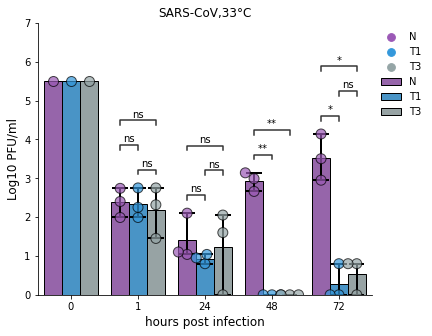

In [10]:
f = plt.figure(figsize=(6, 5))

ax = sns.barplot(data= SARS_33,
                x='hpi',
                y='titer', 
                hue="treatment",
                hue_order= ["N", "T1", "T3"],
                palette = sns.color_palette(custcol),
                linewidth=1,
                edgecolor = "black",
                capsize=.2,
                errcolor = "black",
                errwidth=2,
                 )
g1 = sns.swarmplot(data= SARS_33,
                x='hpi',
                y='titer', 
                hue="treatment",
                hue_order= ["N", "T1", "T3"],
                dodge = True, 
                palette = sns.color_palette(custcol),
                size = 10,
                linewidth=1,
                edgecolor = "black",
                alpha = 0.7,
                )


x = "hpi"
y='titer'
hue = "treatment"
box_pairs=[
    ((1.0, "N"), (1.0, "T1")),
    ((1.0, "N"), (1.0, "T3")),
    ((1.0, "T1"), (1.0, "T3")),
    ((24.0, "N"), (24.0, "T1")),
    ((24.0, "N"), (24.0, "T3")),
    ((24.0, "T1"), (24.0, "T3")),
    ((48.0, "N"), (48.0, "T1")),
    ((48.0, "N"), (48.0, "T3")),
    #((48.0, "T1"), (48.0, "T3")),
    ((72.0, "N"), (72.0, "T1")),
    ((72.0, "N"), (72.0, "T3")),
    ((72.0, "T1"), (72.0, "T3")),
    ]
add_stat_annotation(ax, data=SARS_33, x=x, y=y, hue=hue, hue_order= ["N", "T1", "T3"], box_pairs=box_pairs, test="t-test_paired",comparisons_correction= None, loc='inside', verbose=2)


plt.yscale("linear")
plt.ylim([0,7])
plt.title("SARS-CoV,33°C")
plt.ylabel("Log10 PFU/ml",size="large")
plt.xlabel("hours post infection",size="large")
plt.legend(loc="upper left", bbox_to_anchor=(1,1), frameon=False)

sns.despine()

plt.savefig('Figure2aII.pdf', bbox_inches = 'tight')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1_T1 v.s. 1_T3: t-test paired samples, P_val=8.970e-01 stat=1.465e-01
24_N v.s. 24_T1: t-test paired samples, P_val=1.857e-01 stat=1.984e+00
48_N v.s. 48_T1: t-test paired samples, P_val=2.245e-03 stat=2.107e+01
72_N v.s. 72_T1: t-test paired samples, P_val=8.506e-04 stat=3.427e+01
1_N v.s. 1_T1: t-test paired samples, P_val=2.679e-01 stat=1.520e+00
24_N v.s. 24_T3: t-test paired samples, P_val=1.857e-01 stat=1.984e+00
48_N v.s. 48_T3: t-test paired samples, P_val=2.245e-03 stat=2.107e+01
72_N v.s. 72_T3: t-test paired samples, P_val=8.506e-04 stat=3.427e+01
1_N v.s. 1_T3: t-test paired samples, P_val=6.394e-01 stat=5.467e-01


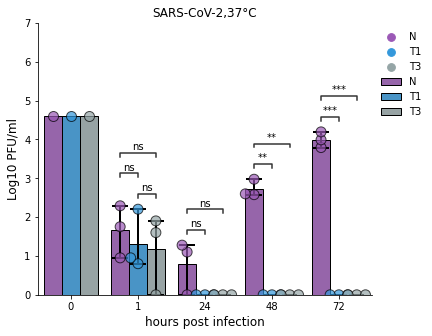

In [11]:
f = plt.figure(figsize=(6, 5))
ax = sns.barplot(data= SARS2_37,
                x='hpi',
                y='titer', 
                hue="treatment",
                hue_order= ["N", "T1", "T3"],
                palette = sns.color_palette(custcol),
                linewidth=1,
                edgecolor = "black",
                capsize=.2,
                errcolor = "black",
                errwidth=2,
                 )
g1 = sns.swarmplot(data= SARS2_37,
                x='hpi',
                y='titer', 
                hue="treatment",
                hue_order= ["N", "T1", "T3"],
                dodge = True, 
                palette = sns.color_palette(custcol),
                size = 10,
                linewidth=1,
                edgecolor = "black",
                alpha = 0.7,
                )

x = "hpi"
y='titer'
hue = "treatment"
box_pairs=[
    ((1.0, "N"), (1.0, "T1")),
    ((1.0, "N"), (1.0, "T3")),
    ((1.0, "T1"), (1.0, "T3")),
    ((24.0, "N"), (24.0, "T1")),
    ((24.0, "N"), (24.0, "T3")),
    #((24.0, "T1"), (24.0, "T3")),
    ((48.0, "N"), (48.0, "T1")),
    ((48.0, "N"), (48.0, "T3")),
    #((48.0, "T1"), (48.0, "T3")),
    ((72.0, "N"), (72.0, "T1")),
    ((72.0, "N"), (72.0, "T3")),
    #((72.0, "T1"), (72.0, "T3")),
    ]
add_stat_annotation(ax, data=SARS2_37, x=x, y=y, hue=hue, hue_order= ["N", "T1", "T3"], box_pairs=box_pairs, test="t-test_paired",comparisons_correction= None, loc='inside', verbose=2)


plt.yscale("linear")
plt.ylim([0,7])
plt.title("SARS-CoV-2,37°C")
plt.ylabel("Log10 PFU/ml",size="large")
plt.xlabel("hours post infection",size="large")
plt.legend(loc="upper left", bbox_to_anchor=(1,1), frameon=False)

sns.despine()

plt.savefig('Figure2aIII.pdf', bbox_inches = 'tight')

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1_T1 v.s. 1_T3: t-test paired samples, P_val=6.401e-01 stat=5.455e-01
24_N v.s. 24_T1: t-test paired samples, P_val=1.773e-01 stat=2.046e+00
24_T1 v.s. 24_T3: t-test paired samples, P_val=1.835e-01 stat=2.000e+00
48_N v.s. 48_T1: t-test paired samples, P_val=3.005e-03 stat=1.820e+01
72_N v.s. 72_T1: t-test paired samples, P_val=1.941e-02 stat=7.073e+00
72_T1 v.s. 72_T3: t-test paired samples, P_val=4.226e-01 stat=1.000e+00
1_N v.s. 1_T1: t-test paired samples, P_val=7.295e-01 stat=3.973e-01
24_N v.s. 24_T3: t-test paired samples, P_val=3.854e-04 stat=5.092e+01
48_N v.s. 48_T3: t-test paired samples, P_val=3.005e-03 stat=1.820e+01
72_N v.s. 72_T3: t-test paired samples, P_val=1.085e-03 stat=3.034e+01
1_N v.s. 1_T3: t-test paired samples, P_val=2.032e-01 stat=1.865e+00


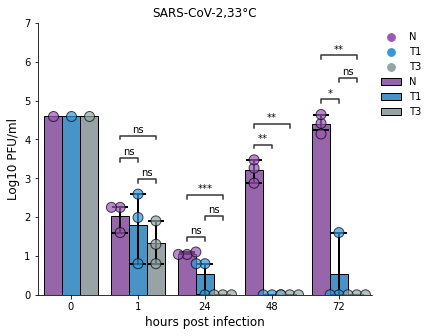

In [12]:
f = plt.figure(figsize=(6, 5))
ax = sns.barplot(data= SARS2_33,
                x='hpi',
                y='titer', 
                hue="treatment",
                hue_order= ["N", "T1", "T3"],
                palette = sns.color_palette(custcol),
                linewidth = 1, 
                edgecolor = "black", 
                capsize=.2,
                errcolor = "black",
                errwidth=2,
                 )
g1 = sns.swarmplot(data= SARS2_33,
                x='hpi',
                y='titer', 
                hue="treatment",
                hue_order= ["N", "T1", "T3"],
                dodge = True, 
                palette = sns.color_palette(custcol),
                size = 10,
                linewidth=1,
                edgecolor = "black",
                alpha = 0.7,
                )

x = "hpi"
y='titer'
hue = "treatment"
box_pairs=[
    ((1.0, "N"), (1.0, "T1")),
    ((1.0, "N"), (1.0, "T3")),
    ((1.0, "T1"), (1.0, "T3")),
    ((24.0, "N"), (24.0, "T1")),
    ((24.0, "N"), (24.0, "T3")),
    ((24.0, "T1"), (24.0, "T3")),
    ((48.0, "N"), (48.0, "T1")),
    ((48.0, "N"), (48.0, "T3")),
    #((48.0, "T1"), (48.0, "T3")),
    ((72.0, "N"), (72.0, "T1")),
    ((72.0, "N"), (72.0, "T3")),
    ((72.0, "T1"), (72.0, "T3")),
    ]
add_stat_annotation(ax, data=SARS2_33, x=x, y=y, hue=hue, hue_order= ["N", "T1", "T3"], box_pairs=box_pairs, test="t-test_paired",comparisons_correction= None, loc='inside', verbose=2)



plt.yscale("linear")
plt.ylim([0,7])
plt.title("SARS-CoV-2,33°C")
plt.ylabel("Log10 PFU/ml",size="large")
plt.xlabel("hours post infection",size="large")
plt.legend(loc="upper left", bbox_to_anchor=(1,1), frameon=False)

sns.despine()

plt.savefig('Figure2aIV.pdf', bbox_inches = 'tight')